# POM21 Text to Image Synthesis with Stored Vectors
BigGAN + CLIP + CMA-ES.

## NEWER VERSION

Based on [j.mp/wanderclip](https://j.mp/wanderclip) by Eyal Gruss [@eyaler](https://twitter.com/eyaler) [eyalgruss.com](https://eyalgruss.com)

Modified to run on nautilus.optiputer.net/z8 by robert.twomey@gmail.com

# Start Here, Then Run All

Results show up in `/work/results/` in the file browser at left

In [1]:
!pip install ipython-autotime
%load_ext autotime

Defaulting to user installation because normal site-packages is not writeable
time: 298 µs (started: 2021-10-29 06:56:41 -05:00)


In [2]:
prompts = [
#     "a euglena in a petri dish",
#     "a ginger cat"
#     "a viola provides the potential for communication"
#     "the potentiality of the virtual space"
#     "a human living with a machine"
#     "decomposing matter with the roots of a plant"
#     "a euglena seen through a microscope"
#     "a unexpected surprise"
#     "the decomposition of an artificial intelligence"
#     "the extraction of thought from human writers"
    "setting our machines loose into rich nourishing nature"
]


# prompts = [
#     #prompt 5
#     "a painting of pygmalion",
#     "a sculptor who fell in love with his own sculpture",
#     "everyone who saw her would fall in love with her",
#     "beautiful reflections of our digital twinse",
#     "a statue of a woman",
#     "a living breathing woman",
#     "our digital twins, artificial intelligence",
#     "a projection of our deepest fears"
# ]

# prompts = [
#     #prompt 4
#     "the first computing devices were powered by steam engines",
#     "fueled with the burning of fossilized coal",
#     "the bones of sparse data structures",
#     "the slow demise of our geological resources",
#     "extracting lithium",
#     "battery technology",
#     "computing devices can be charged without being plugged in",
#     "key contributor to climate change",
#     "we are powered by imagination",
#     "the machines we use to think",
#     "the machines that are destroying the planet"
    
# ]

# prompts = [
#     # prompt 2
#     "the glow of a television screen",
    
#     # prompt 3
#     "an xray of the first silicon chip",
#     "the dover demonstration chip",
#     "a picture of his arthritic hands",
#     "a piece of wire to connect two silicon squares",
#     "smaller and smaller computer chips",
#     "the kilby diode",
#     "a silicon mold of a friends hands"
# ]

# prompts = [
    # prompt 1
#     "a mushroom is the aerial manifestation of a larger infestation",
#     "a mushrooms above ground growth is the result of a set of instructions",
#     "growing mushrooms in the fire-stricken forests of LA",
#     "growing mushrooms in the forests is a way to uncover their potential"    
#     "a seed, a plant's basic unit, remains ever in potentia",
#     "they make us have arms and not wings", 
#        "the fire-stricken forests of LA",
#    "the fruiting body of a larger organism"
#]

# prompts = [
        # prompt 3
#     "in these containers, we care for machines",    
# ]

# prompts = [
    # prompt 2
#     "a family of robotic seals",
#     "nursing homes in japan",
#     "to help the elderly cope", 
#     "the after effects of the Tsunami",
#     "the children laugh and smile",
#     "their homes washed away",
#     "watching the news on television",
#     "spoke through a microphone",
#     "the robotic seals danced"
# ]

# prompts_pom1 = [
#     # 001
#     "an elegant machine that learns to generate artificial images",
#     "the sublime experience of an iceberg",
#     "ice is a vastness of possibilities",
#     "the vastness of possibilities of water is not a spatial vastness",
#     # 002
#     "a drawing of an elegant machine",
#     "a machine that learns to make images",
#     "a drawing of a machine that learns to make images",
#     # 003
#     "eighteenth century painting of humans encountering nature",
#     "a person encountering nature",
#     "a vastness of spatial dimensions",
#     "a network",
#     "a network of vast spatial dimensions",
#     "a space of unlimited possibilities that the network must explore"
# ]

# seeding/iteration
seed = 10#128 #255#1#5#9#3
iterations = 50#100#40
terminal_iterations = iterations

time: 1.15 ms (started: 2021-10-29 06:56:41 -05:00)


In [24]:
import os
# file paths
work = "/home/twomeylab/rtwomey/work/"
outpath = os.path.join(work, "outputs_pom_seed_128/")
storedpath = os.path.join(work, "process/stored_outputs_pom_seed_128/")
resultspath = os.path.join(work, "results/results_pom_seed_128/")

time: 490 µs (started: 2021-10-29 07:01:39 -05:00)


# 0. Configuration

In [3]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
!pip install pytorch-pretrained-biggan
!pip install nltk
!pip install cma


Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
time: 4.29 s (started: 2021-10-29 06:56:41 -05:00)


In [31]:
# for UNL CRANE - gpu_v100
#!pip install scipy
!git clone https://github.com/openai/CLIP.git
# !pip install ftfy
#!pip install imageio

Cloning into 'CLIP'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 168 (delta 36), reused 56 (delta 29), pack-reused 91
Receiving objects: 100% (168/168), 8.92 MiB | 27.42 MiB/s, done.
Resolving deltas: 100% (76/76), done.
time: 1.07 s (started: 2021-10-29 07:04:57 -05:00)


In [32]:
# !python -m pip list | grep -E "ftfy|regex|tqdm|torch|torchvision"

time: 266 µs (started: 2021-10-29 07:05:02 -05:00)


# 1. Imports to start session

## Load Models:

- BigGAN Deep 512
- CLIP OpenAI
- Wordnet
- CMA


In [33]:
from pytorch_pretrained_biggan import BigGAN
last_gen_model = 'biggan-deep-512'
biggan_model = BigGAN.from_pretrained(last_gen_model).cuda().eval()

time: 1.29 s (started: 2021-10-29 07:05:04 -05:00)


In [34]:
cd CLIP

/home/twomeylab/rtwomey/work/visual-imagination/CLIP/CLIP
time: 3.33 ms (started: 2021-10-29 07:05:05 -05:00)


In [35]:
import clip
last_clip_model = 'ViT-B/32'
perceptor, preprocess = clip.load(last_clip_model)

time: 2.65 s (started: 2021-10-29 07:05:06 -05:00)


In [36]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/twomeylab/rtwomey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

time: 3.72 ms (started: 2021-10-29 07:05:09 -05:00)


In [37]:
import cma
from cma.sigma_adaptation import CMAAdaptSigmaCSA, CMAAdaptSigmaTPA
import warnings
warnings.simplefilter("ignore", cma.evolution_strategy.InjectionWarning)

time: 364 µs (started: 2021-10-29 07:05:09 -05:00)


# 2. Config

1. For **prompt** OpenAI suggest to use the template "A photo of a X." or "A photo of a X, a type of Y." [[paper]](https://cdn.openai.com/papers/Learning_Transferable_Visual_Models_From_Natural_Language_Supervision.pdf)
2. For **initial_class** you can either use free text or select a special option from the drop-down list.
3. Free text and 'From prompt' might fail to find an appropriate ImageNet class.
4. **seed**=0 means no seed.

In [38]:
# prompt is set above
gen_model = 'biggan-deep' #@param ['biggan-deep', 'sigmoid']
size = '512' #@param [512, 256, 128] 
color = True #@param {type:'boolean'}
initial_class = 'Random mix' #@param ['From prompt', 'Random class', 'Random Dirichlet', 'Random mix', 'Random embeddings'] {allow-input: true}
optimize_class = True #@param {type:'boolean'}
class_smoothing = 0.1 #@param {type:'number'}
truncation = 1 #@param {type:'number'}
stochastic_truncation = False #@param {type:'boolean'}
optimizer = 'CMA-ES' #@param ['SGD','Adam','CMA-ES','CMA-ES + SGD interleaved','CMA-ES + Adam interleaved','CMA-ES + terminal SGD','CMA-ES + terminal Adam']
pop_size = 50 #@param {type:'integer'}
clip_model = 'ViT-B/32' #@param ['ViT-B/32','RN50','RN101','RN50x4']
augmentations =  64#@param {type:'integer'}
learning_rate =  0.1#@param {type:'number'}
noise_normality_loss =  0#@param {type:'number'}
embed_normality_loss = 0 #@param {type:'number'}
minimum_entropy_loss = 0.0001 #@param {type:'number'}
total_variation_loss = 0.1 #@param {type:'number'}
# iterations = 100 #@param {type:'integer'}
# terminal_iterations = 100 #@param {type:'integer'}

# live POM
iterations = 20#100#40
terminal_iterations = iterations
show_every = 1 #@param {type:'integer'}
save_every = 5 #@param {type:'integer'}
fps = 1 #@param {type:'number'}
freeze_secs = 0 #@param {type:'number'}

# non-live POM
# show_every = 1 #@param {type:'integer'}
# save_every = 5 #@param {type:'integer'}
# fps = 1 #@param {type:'number'}
# freeze_secs = 0 #@param {type:'number'}
seed =  1#@param {type:'number'}


softmax_temp = 1
emb_factor = 0.067 #calculated empirically 
loss_factor = 100
sigma0 = 0.5 #http://cma.gforge.inria.fr/cmaes_sourcecode_page.html#practical
cma_adapt = True
cma_diag = 'sigmoid' in gen_model
cma_active = True
cma_elitist = False

time: 990 µs (started: 2021-10-29 07:05:09 -05:00)


# 3. Generate

Imports:

In [39]:
import numpy as np
import torch
from torch import nn
import torchvision
import sys
import imageio
from IPython.display import HTML, Image, clear_output
from scipy.stats import truncnorm, dirichlet
from pytorch_pretrained_biggan import BigGAN, convert_to_images, one_hot_from_names, utils
from nltk.corpus import wordnet as wn
#from base64 import b64encode
from time import time
import datetime

time: 451 µs (started: 2021-10-29 07:05:09 -05:00)


Seeding (repeatable randomness):

In [40]:
if seed == 0:
    seed = None
    state = None
else:
    # torch.manual_seed(np.random.randint(sys.maxsize))
    state = np.random.RandomState(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

time: 684 µs (started: 2021-10-29 07:05:15 -05:00)


Make output directories:

In [41]:
# directories are defined up top
!rm -rf $outpath
!mkdir -p $outpath
!mkdir -p $resultspath

time: 517 ms (started: 2021-10-29 07:05:17 -05:00)


In [51]:
# noise and class vector sizes
noise_size = 128
class_size = 128 if initial_class.lower()=='random embeddings' else 1000

# load CLIP model unless we just used it
if clip_model != last_clip_model:
  perceptor, preprocess = clip.load(clip_model)
  last_clip_model = clip_model
  
# image resolution, model name
channels = 3 if color else 1
# clip_res = perceptor.input_resolution.item()
clip_res = perceptor.visual.input_resolution
sideX = sideY = int(size)
gen_model = gen_model + '-' + size

# load BigGAN model unless we just used it
if gen_model != last_gen_model and 'biggan' in gen_model:
  biggan_model = BigGAN.from_pretrained(gen_model).cuda().eval()
  last_gen_model = gen_model

# is our image smaller than the clip perceptor?
if sideX<=clip_res and sideY<=clip_res:
  augmentations = 1

# for CMA we produce a population of candidate vectors, otherwise just 1 at a time
if 'CMA' not in optimizer:
  pop_size = 1

# do not optimize class if not using BigGAN
if 'biggan' not in gen_model:
  optimize_class = False

# BigGAN ImageNet class names to WordNet synsets/lemmas
ind2name = {index: wn.of2ss('%08dn'%offset).lemma_names()[0] for offset, index in utils.IMAGENET.items()}

time: 1 s (started: 2021-10-29 07:13:08 -05:00)


In [53]:
def replace_to_inplace_relu(model): #saves memory; from https://github.com/minyoungg/pix2latent/blob/master/pix2latent/model/biggan.py
    for child_name, child in model.named_children():
        if isinstance(child, nn.ReLU):
            setattr(model, child_name, nn.ReLU(inplace=False))
        else:
            replace_to_inplace_relu(child)
    return

replace_to_inplace_relu(biggan_model)
replace_to_inplace_relu(perceptor)

time: 1.19 ms (started: 2021-10-29 07:13:16 -05:00)


Image and vectors saving helpers: 

In [54]:
def save(out,name=None):
  with torch.no_grad():
    out = out.cpu().numpy()
  img = convert_to_images(out)[0]
  if name:
    imageio.imwrite(name, np.asarray(img))
  return img

def save_vec(out,name):
  with torch.no_grad():
    vec = out.cpu().numpy()
  np.savetxt(name, vec)

def save_all_vecs(out, name):
  with torch.no_grad():
    vec = out.cpu().numpy()
  np.savetxt(name, vec)

hist = []
def checkin(i, best_ind, total_losses, losses, regs, out, noise=None, emb=None, probs=None):
  global sample_num, hist
  name = None
  if save_every and i%save_every==0:
    name = '%s/frame_%05d.jpg'%(outpath, sample_num)
  pil_image = save(out, name)
  vals0 = [sample_num, i, total_losses[best_ind], losses[best_ind], regs[best_ind], np.mean(total_losses), np.mean(losses), np.mean(regs), np.std(total_losses), np.std(losses), np.std(regs)]
  stats = 'sample=%d iter=%d best: total=%.2f cos=%.2f reg=%.3f avg: total=%.2f cos=%.2f reg=%.3f std: total=%.2f cos=%.2f reg=%.3f'%tuple(vals0)
  vals1 = []
  if noise is not None:
    vals1 = [np.mean(noise), np.std(noise)]
    stats += ' noise: avg=%.2f std=%.3f'%tuple(vals1)
  vals2 = []
  if emb is not None:
    vals2 = [emb.mean(),emb.std()]
    stats += ' emb: avg=%.2f std=%.3f'%tuple(vals2)
  elif probs:
    best = probs[best_ind]
    inds = np.argsort(best)[::-1]
    probs = np.array(probs)
    vals2 = [ind2name[inds[0]], best[inds[0]], ind2name[inds[1]], best[inds[1]], ind2name[inds[2]], best[inds[2]], np.sum(probs >= 0.5)/pop_size,np.sum(probs >= 0.3)/pop_size,np.sum(probs >= 0.1)/pop_size]
    stats += ' 1st=%s(%.2f) 2nd=%s(%.2f) 3rd=%s(%.2f) components: >=0.5:%.0f, >=0.3:%.0f, >=0.1:%.0f'%tuple(vals2)
  hist.append(vals0+vals1+vals2)
  if show_every and i%show_every==0:
    clear_output()
    display(pil_image)  
  print(stats)
  print('Best index: %s' % best_ind)

  # save best vectors
  save_vec(noise_vector[best_ind], outpath+'noise_%05d.txt'%sample_num)
  save_vec(class_vector[best_ind], outpath+'class_%05d.txt'%sample_num)  
  sample_num += 1

time: 1.53 ms (started: 2021-10-29 07:13:17 -05:00)


GAN generation helpers:

In [55]:
def get_output(noise_vector, class_vector):
  save_class_vector_norm = None
  if 'sigmoid' in gen_model:
    out = noise_vector.sigmoid().reshape(1, channels, sideY, sideX)*2-1
  else:
    if stochastic_truncation: #https://arxiv.org/abs/1702.04782
      with torch.no_grad():
        trunc_indices = noise_vector.abs() > 2*truncation
        size = torch.count_nonzero(trunc_indices).cpu().numpy()
        trunc = truncnorm.rvs(-2*truncation, 2*truncation, size=(1,size)).astype(np.float32)
        noise_vector.data[trunc_indices] = torch.tensor(trunc, requires_grad=requires_grad, device='cuda')
    else:
      noise_vector = noise_vector.clamp(-2*truncation, 2*truncation)
    if initial_class.lower() == 'random embeddings':
      class_vector_norm = class_vector*emb_factor
    else:
      class_vector_norm = torch.softmax(class_vector/softmax_temp,dim=-1)
    out = biggan_model(noise_vector, class_vector_norm, truncation)
    if channels==1:
      out = out.mean(dim=1, keepdim=True)
    if initial_class.lower() != 'random embeddings':
      save_class_vector_norm = class_vector_norm
  if channels==1:
    out = out.repeat(1,3,1,1)
  return out, save_class_vector_norm

# define forward pass
def my_forward(self, z, class_label, truncation):
  assert 0 < truncation <= 1

  if initial_class.lower()=='random embeddings':
    embed = class_label
  else:
    embed = self.embeddings(class_label)
    
  cond_vector = torch.cat((z, embed), dim=1)

  z = self.generator(cond_vector, truncation)
  return z

# set forward pass
if gen_model == 'biggan':
    BigGAN.forward = my_forward

time: 1.11 ms (started: 2021-10-29 07:13:18 -05:00)


Text optimization helpers:

In [56]:
def normality_loss(vec): #https://arxiv.org/abs/1903.00925
    mu2 = vec.mean().square()
    sigma2 = vec.var()
    return mu2+sigma2-torch.log(sigma2)-1

def make_safe_filename(s):
    def safe_char(c):
        if c.isalnum():
            return c
        else:
            return "_"
    return "".join(safe_char(c) for c in s).rstrip("_")

time: 446 µs (started: 2021-10-29 07:13:19 -05:00)


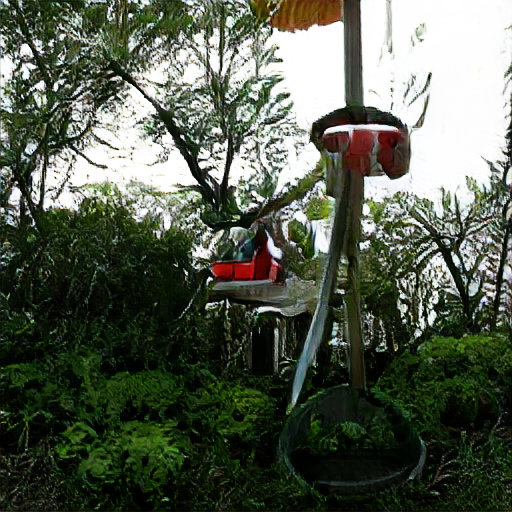

sample=18 iter=18 best: total=72.06 cos=72.00 reg=0.056 avg: total=73.68 cos=73.62 reg=0.056 std: total=0.91 cos=0.91 reg=0.000 noise: avg=0.13 std=0.719 1st=pop_bottle(0.01) 2nd=cannon(0.01) 3rd=microwave(0.01) components: >=0.5:0, >=0.3:0, >=0.1:0
Best index: 20
took: 60 secs (3.17 sec/iter) on GPU 0: Tesla V100-PCIE-32GB (UUID: GPU-f8af298d-16b1-43c7-2718-68be8f2f39d2). CUDA memory: 1.2 GB
global best iteration: 17
prompt: setting our machines loose into rich nourishing nature


In [ ]:
requires_grad = ('SGD' in optimizer or 'Adam' in optimizer) and ('terminal' not in optimizer or terminal_iterations>0)
total_iterations = iterations + terminal_iterations*('terminal' in optimizer)

# ====
# NOT EDITED BELOW

for prompt in prompts:
    
    # initialization
    eps = 1e-8
    class_vector = None
    if 'sigmoid' in gen_model:
      noise_size = channels*sideY*sideX
      noise_vector = np.random.rand(pop_size, noise_size).astype(np.float32)
      noise_vector = np.log((noise_vector+eps)/(1-noise_vector+eps))
    else:
      noise_vector = truncnorm.rvs(-2*truncation, 2*truncation, size=(pop_size, noise_size), random_state=state).astype(np.float32) #see https://github.com/tensorflow/hub/issues/214

      if initial_class.lower() == 'random class':
        class_vector = np.ones(shape=(pop_size, class_size), dtype=np.float32)*class_smoothing/999
        class_vector[0,np.random.randint(class_size)] = 1-class_smoothing
      elif initial_class.lower() == 'random dirichlet':
        class_vector = dirichlet.rvs([pop_size/class_size] * class_size, size=1, random_state=state).astype(np.float32)
      elif initial_class.lower() == 'random mix':
        class_vector = np.random.rand(pop_size, class_size).astype(np.float32)
      elif initial_class.lower() == 'random embeddings':
        class_vector = np.random.randn(pop_size, class_size).astype(np.float32)
      else:
        if initial_class.lower() == 'from prompt':
          initial_class = prompt
        try:
          class_vector = None
          class_vector = one_hot_from_names(initial_class, batch_size=pop_size)
          assert class_vector is not None
          class_vector = class_vector*(1-class_smoothing*class_size/(class_size-1))+class_smoothing/(class_size-1)
        except Exception as e:  
          print('Error: could not find initial_class. Try something else.')
          raise e

      if initial_class.lower() != 'random embeddings':
        class_vector = class_vector/np.sum(class_vector,axis=-1, keepdims=True)
        class_vector = np.log(class_vector+eps)-np.mean(np.log(class_vector+eps),axis=-1, keepdims=True)
      initial_class_vector = class_vector[0]
      if initial_class.lower() in ('random mix','random embeddings'):
        initial_class_vector = initial_class_vector*0
      class_vector = torch.tensor(class_vector, requires_grad=requires_grad, device='cuda')
      smoothed_ent = -torch.tensor(class_smoothing*np.log(class_smoothing/999+eps)+(1-class_smoothing)*np.log(1-class_smoothing+eps), dtype=torch.float32).cuda()
    noise_vector = torch.tensor(noise_vector, requires_grad=requires_grad, device='cuda')

    if requires_grad:
      params = [noise_vector]
      if optimize_class:
        params = params + [class_vector]
      if 'SGD' in optimizer:
        optim = torch.optim.SGD(params, lr=learning_rate, momentum=0.9)  
      else:
        optim = torch.optim.Adam(params, lr=learning_rate)

    # convert prompt to tokenized target
    tx = clip.tokenize(prompt)
    with torch.no_grad():
      target_clip = perceptor.encode_text(tx.cuda())
    
    # store best results as we optimize this prompt
    global_best_loss = np.inf
    global_best_iteration = 0
    global_best_noise_vector = None
    global_best_class_vector = None

    # ascend the text
    def ascend_txt(i, grad_step=False, show_save=False):
      global global_best_loss, global_best_iteration, global_best_noise_vector, global_best_class_vector
      prev_class_vector_norms = []
      regs = []
      losses = []
      total_losses = []
      best_loss = np.inf
      global_reg = torch.tensor(0, device='cuda', dtype=torch.float32, requires_grad=grad_step)
      if 'biggan' in gen_model:
        if optimize_class and embed_normality_loss and initial_class.lower() == 'random embeddings':
          global_reg = global_reg+embed_normality_loss*normality_loss(class_vector)
        if noise_normality_loss:
          global_reg = global_reg+noise_normality_loss*normality_loss(noise_vector)
        global_reg = loss_factor*global_reg  
        if grad_step:
          global_reg.backward()
      for j in range(pop_size):
        p_s = []
        out, class_vector_norm = get_output(noise_vector[j:j+1], None if class_vector is None else class_vector[j:j+1])
        if class_vector_norm is not None:
          with torch.no_grad():
            prev_class_vector_norms.append(class_vector_norm.cpu().numpy()[0])

        for aug in range(augmentations):
          if sideX<=clip_res and sideY<=clip_res or augmentations==1:
            apper = out  
          else:
            size = torch.randint(int(.7*sideX), int(.98*sideX), ())
            offsetx = torch.randint(0, sideX - size, ())
            offsety = torch.randint(0, sideX - size, ())
            apper = out[:, :, offsetx:offsetx + size, offsety:offsety + size]
          apper = (apper+1)/2
          apper = nn.functional.interpolate(apper, clip_res, mode='bilinear')
          #apper = apper.clamp(0,1)
          p_s.append(apper)
        into = nom(torch.cat(p_s, 0))
        predict_clip = perceptor.encode_image(into)
        loss = loss_factor*(1-torch.cosine_similarity(predict_clip, target_clip).mean())
        
#         print("tokens:", tx)
#         print("target clip:", target_clip)
#         print("predict clip:",predict_clip)
#         print("cosine_sim:", torch.cosine_similarity(predict_clip, target_clip).mean())
#         sys.exit()

        total_loss = loss
        regs.append(global_reg.item())
        if 'sigmoid' in gen_model and total_variation_loss or 'biggan' in gen_model and optimize_class and minimum_entropy_loss and initial_class.lower() != 'random embeddings':
          if 'sigmoid' in gen_model and total_variation_loss:
            reg = total_variation_loss*((out[:, :, :-1, :] - out[:, :, 1:, :]).abs().mean() + (out[:, :, :, :-1] - out[:, :, :, 1:]).abs().mean())
          elif 'biggan' in gen_model and optimize_class and minimum_entropy_loss and initial_class.lower() != 'random embeddings':
            reg = minimum_entropy_loss*((-class_vector_norm*torch.log(class_vector_norm+eps)).sum()-smoothed_ent).abs()
          reg = loss_factor*reg
          total_loss = total_loss + reg
          with torch.no_grad():
            regs[-1] += reg.item()
        with torch.no_grad():
          losses.append(loss.item())
          total_losses.append(total_loss.item()+global_reg.item())
        if total_losses[-1]<best_loss:
          best_loss = total_losses[-1]
          best_ind = j
          best_out = out
          if best_loss < global_best_loss:
            global_best_loss = best_loss
            global_best_iteration = i
            with torch.no_grad():
              global_best_noise_vector = noise_vector[best_ind]
              if class_vector is not None:
                global_best_class_vector = class_vector[best_ind]

        if grad_step:    
          total_loss.backward()

      if grad_step:
        optim.step()
        optim.zero_grad()

      if show_save and (save_every and i % save_every == 0 or show_every and i % show_every == 0):
        noise = None
        emb = None
        if 'biggan' in gen_model:
          with torch.no_grad():
            noise = noise_vector.cpu().numpy()
            if initial_class.lower() == 'random embeddings':
              emb = class_vector.cpu().numpy()
        checkin(i, best_ind, total_losses, losses, regs, best_out, noise, emb, prev_class_vector_norms)  
      return total_losses, best_ind

    nom = torchvision.transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
    if 'CMA' in optimizer:
      initial_vector = np.zeros(noise_size)
      bounds = None
      #if 'biggan' in gen_model and not stochastic_truncation:
      #  bounds = [-2*truncation*np.ones(noise_size),2*truncation*np.ones(noise_size)]
      if optimize_class:
        initial_vector = np.hstack([initial_vector, initial_class_vector])
        #if not stochastic_truncation:
        #  bounds[0] = list(bounds[0]) + [None]*class_size
        #  bounds[1] = list(bounds[1]) + [None]*class_size
      cma_opts = {'popsize': pop_size, 'seed': np.nan, 'AdaptSigma': cma_adapt, 'CMA_diagonal': cma_diag, 'CMA_active': cma_active, 'CMA_elitist':cma_elitist, 'bounds':bounds}
      cmaes = cma.CMAEvolutionStrategy(initial_vector, sigma0, inopts=cma_opts)

    sample_num = 0
    machine = !nvidia-smi -L
    start = time()
    for i in range(total_iterations):    
      if 'CMA' in optimizer and i<iterations:
        with torch.no_grad():
          cma_results = torch.tensor(cmaes.ask(), dtype=torch.float32).cuda()
          if optimize_class:
            noise_vector.data, class_vector.data = torch.split_with_sizes(cma_results, (noise_size, class_size), dim=-1)
            class_vector.data = class_vector.data
          else:
            noise_vector.data = cma_results      
      if requires_grad and ('terminal' not in optimizer or i>=iterations):
        losses, best_ind = ascend_txt(i, grad_step=True, show_save='CMA' not in optimizer or i>=iterations)
        assert noise_vector.requires_grad and noise_vector.is_leaf and (not optimize_class or class_vector.requires_grad and class_vector.is_leaf), (noise_vector.requires_grad, noise_vector.is_leaf, class_vector.requires_grad, class_vector.is_leaf)
      if 'CMA' in optimizer and i<iterations:
        with torch.no_grad():
          losses, best_ind = ascend_txt(i, show_save=True)
          if i<iterations-1:
            if optimize_class:
              vectors = torch.cat([noise_vector,class_vector], dim=1)
            else:
              vectors = noise_vector
            cmaes.tell(vectors.cpu().numpy(), losses)
          elif 'terminal' in optimizer and terminal_iterations:
            pop_size = 1
            noise_vector[0] = global_best_noise_vector
            if class_vector is not None:
              class_vector[0] = global_best_class_vector
      if save_every and i % save_every == 0 or show_every and i % show_every == 0:
        print('took: %d secs (%.2f sec/iter) on %s. CUDA memory: %.1f GB'%(time()-start,(time()-start)/(i+1), machine[0], torch.cuda.max_memory_allocated()/1024**3))
        print('global best iteration: %d' % global_best_iteration)
        print('prompt: %s' % prompt)
        #print('prompt: %s, target-CLIP: %s' % (prompt, target_clip))

    # from modified BigCLIP
    # prompt_safe = prompt.replace(" ","_")
    # results_timestamp = resultspath+'%s_%s' % (prompt_safe, datetime.datetime.now().strftime('%Y%m%d_%H%M%S'))
    # save(best_out, results_timestamp+'.jpg')
    # save_vec(noise_vector[best_ind], results_timestamp+'_noise.txt')
    # save_vec(class_vector[best_ind], results_timestamp+'_class.txt')

#     prompt_safe = prompt.replace(" ","_")
    prompt_safe = make_safe_filename(prompt)
    out, _ = get_output(global_best_noise_vector.unsqueeze(0), None if global_best_class_vector is None else global_best_class_vector.unsqueeze(0))
    name = '%s/%s.jpg'%(resultspath, prompt_safe)
    pil_image = save(out,name)
    save_vec(global_best_noise_vector, '%s/%s_noise.txt' % (resultspath, prompt_safe))
    save_vec(global_best_class_vector, '%s/%s_class.txt' % (resultspath, prompt_safe))

    display(pil_image)  
    print('best_loss=%.2f best_iter=%d'%(global_best_loss,global_best_iteration))

    # move outputs to saved path with datestampt
#     newdir = outpath[:-1]+"_"+prompt_safe+"_"+datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
#     newdir = storedpath+prompt_safe+"_"+datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    newdir_timestamp = storedpath+prompt_safe+"_"+datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    newdir = storedpath+prompt_safe
    !mv $outpath $newdir_timestamp
    !ln -s $newdir_timestamp $newdir
    !mkdir -p $outpath

# Reference


Based on SIREN+CLIP Colabs by: [@advadnoun](https://twitter.com/advadnoun), [@norod78](https://twitter.com/norod78)

Using the works:

https://github.com/openai/CLIP

https://tfhub.dev/deepmind/biggan-deep-512

https://github.com/huggingface/pytorch-pretrained-BigGAN

http://www.aiartonline.com/design-2019/eyal-gruss (WanderGAN)

Other CLIP notebooks: https://www.reddit.com/r/MachineLearning/comments/ldc6oc/p_list_of_sitesprogramsprojects_that_use_openais

A curated list of more online generative tools see: [j.mp/generativetools](https://j.mp/generativetools)


# Leftovers

leftover prompts

In [19]:
# prompts = [
#     "over my head, I see the bronze butterfly",
#     "asleep on the black trunk",
#     "blowing like a leaf in green shadow",   
#     "down the ravine behind the empty house",   
#     "the cowbells follow one another",   
#     "into the distances of the afternoon",   
#     "to my right",
#     "in a field of sunlight between two pines",   
#     "the droppings of last year’s horses",   
#     "blaze up into golden stones",
#     "I lean back, as the evening darkens and comes on",
#     "a chicken hawk floats over, looking for home",
#     "I have wasted my life"
# ]

# prompts = [
#     "Midway on our lifes journey, I found myself",
#     "In dark woods, the right road lost",
#     "To tell About those woods is hard - so tangled and rough",
#     "And savage that thinking of it now, I feel",
#     "The old fear stirring: death is hardly more bitter.",
#     "And yet, to treat the good I found there as well",
#     "I'll tell what I saw, though how I came to enter",
#     "I cannot well say, being so full of sleep",
#     "Whatever moment it was I began to blunder",
#     "Off the true path. But when I came to stop",
#     "Below a hill that marked one end of the valley",
#     "That had pierced my heart with terror, I looked up",
#     "Toward the crest and saw its shoulders already",
#     "Mantled in rays of that bright planet that shows",
#     "The road to everyone, whatever our journey.",
#     "Then I could feel the terror begin to ease",
#     "That churned in my heart's lake all through the night.",
#     "As one still panting, ashore from dangerous seas",
#     "Looks back at the deep he has escaped, my thought",
#     "Returned, still fleeing, to regard that grim defile", 
#     "That never left any alive who stayed in it."
# ]

# prompts = [
#     'a photo of wild tarragon',
#     'a drawing of wild tarragon, a tasteless plant',
#     'a painting of farm hands, a kind of laborer',
#     'a painting of a farmer’s hands',
#     'a self-portrait of Artemisia Gentileschi, artist',
#     'artemisia Gentileschi is a dragon',
#     'a painting of Artemisia Gentileschi as a dragon',
#     'a photo of the dragon Artemisia Gentileschi',
#     'a portrait of artist as dragon',
#     'a drawing of a dragon',
#     'a painting of uprooted rhizome as a dragon',
#     'a sketch of a rhizome, uprooted',
#     'an image of a plant rising',
#     'a drawing of plant roots and mycorrhizal fungi',
#     'an image of growing wiser',
#     'a painting of wise plants',
#     'a drawing of plant wisdom',
#     'a photo of a plant hiding',
#     'a drawing of hiding from elders',
#     'a painting of Susanna and the Elders',
#     'an image of creeps',
#     'a painting of gazing creeps',
#     'a painting of groping creeps',
#     'a painting of invasive elders',
#     'a photo of perverse hope',
#     'a painting of your hatred',
#     'a drawing of killing a mosquito',
#     'a painting of a mosquito, a kind of corpse',
#     'a drawing of malaria',
#     'a sketch of salted fields',
#     'a photo of dancers',
#     'a painting of dancers in a field',
#     'an image of your spit',
#     'a photo of standing too close',
#     'a painting of someone standing too close',
#     'a drawing of an oak sapling',
#     'a painting of an oak in an empty field',
#     'a photo of growing',
#     'an image of growing wilder',
#     'a painting of growing stronger',
#     'a photo of a hand holding high',
#     'a painting of a hand holding the head of Holofernes',
#     'a painting of the head of Holofernes',
#     'a drawing of a head, blood-rooted',
#     'an image of a bloody root',
#     'a painting of autumn gold',
#     'a photo of a golden gown',
#     'an image of a mouth tasting',
#     'a sketch of a mouth',
#     'a drawing of taste',
#     'a painting of the taste of nothing',
#     'a photograph of being invisible',
#     'a drawing of your renown',
#     'a painting of a renowned artist',
#     'a portrait of the artist',
#     'a self-portrait of Artemisia Gentileschi as tarragon'
# ]

# prompts = [
#     "sunrise through a window",
#     "a cat in the refrigerator"
#     "microsoft basic on a tandy 1000"
#     "a canvas on an easel in a field",
#     "a painter painting on an easel in a field",
#     "a painting on an easel in the landscape"
# ]

# prompts = [
#     "sunrise through a window",
#     "a cat in the refrigerator"
# ]

time: 2.93 ms (started: 2021-09-15 20:28:20 +00:00)
